<center><font size="+2">Introduction to Programming and</font></center>
<center><font size="+2">Data Processing in Python 2020/2021</font></center>
<br/>
<center><font size="+1">Core course, PhD program in Computer Science</font></center>
<center><font size="+1">GSSI Gran Sasso Science Institute, L'Aquila, Italy</font></center><br/>

<center><font size="+2">Course responsibles</font></center>
<center><font size="+1"><a href="https://www.linkedin.com/in/daniele-licari">Daniele Licari</a> &nbsp; d.licari@santannapisa.it</font></center>
<center><font size="+1">
    &nbsp;&nbsp;
    <a href="https://www.santannapisa.it/en/andrea-vandin">Andrea Vandin</a> &nbsp; a.vandin@santannapisa.it</font></center>

---
---

<center><font size="+2">Part 1</font></center>
<center><font size="+1">Advanced Libraries for data manipulation/visualization</font></center>
<center><font size="+1">Overview of NumPy & Pandas</font></center>

---
---

# Notes and references about Part 1

## The role of Part 1

* We assume that you
  * have experience in programming
  * know python, or are able to grasp it by examples
* This part of the course gives an overview of popular Python libraries for data processing
  * You can see this notebook as a first place to look at when you need to use them
  * It also contains examples and references to further material
* In the second part of the course you will be using these libraries on a case study on data analysis/machine learning
  * Diagnosis of benign/malignant breast cancer

## What is Part 1 about

This notebook is based on Chapter 4 of the following book:
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/wesm/pydata-book)
* Some pictures have been taken from these sources

In particular, this notebook will introduce the Python libraries (_packages_):
* [NumPy](https://numpy.org/): 
   * scientific computing
* [Pandas](https://pandas.pydata.org/): 
   * working with structured data (CSV, Spreadsheets, Databases)
   * creating plots

> Note: in this notebook we will often refer interchangeably to _arrays_, _NumPy arrays_ or just _ndarrays_. 
<br/>
> You can think of __arrays as lists with better performances__ for numerical computing

# NumPy
NumPy, short for Numerical Python, is the Python package for scientific computing
<br/>
It provides:
* An efficient implementation for list-like multidimensional data structures named __NumPy arrays__ or __ndarray__
  * including functions for performing
    * element-wise computations on arrays 
    * mathematical operations between arrays
* Tools for reading/writing datasets from/to disk and arrays
* Linear algebra operations, Fourier transform, and random number generation
* 1-line plotting functionalities
* Tools for integrating C, C++, and Fortran code with Python
  * Useful to use legacy code
  * Useful to use very efficient and established libraries for scientifical computation


For data coming from numerical experiments (or from noisy measurements) 
* NumPy arrays are a more efficient way of storing and manipulating data than the other built-in Python data structures.

## Install and import the NumPy module
The first time you run this notebook you might have to install Pandas using the following script:

In [1]:
import sys
#sys.executable
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

As we saw in the last class:
* This means that when you see `np.arange`, we refer to `numpy.arange`, the `arange` function in NumPy.

## Main features: Arrays, Vectorized Computation, Broadcast

Numpy provides:
* __ndarray__, a multidimensional array providing vectorized arithmetic operations and broadcasting capabilities
   * Vectorized arithmetic operations: a bit like in list comprehensions, operations between arrays are done iterating over the elements of the arrays at C level rather than at Python level, obtaining better performances. The syntax is more concise
   * [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html): in certain cases, operations on arrays can be done even if they do not have same dimensions. Pyhton tries to guess what to do
* Standard mathematical functions for applying operations on entire arrays without having to write loops

Let's create a ndarray and a list with 10mln elements.

In [363]:
import numpy as np
np_arr = np.arange(10000000) #10 mln
py_list = list(range(10000000)) #10 mln

print('np_arr has type',type(np_arr))
print('py_list has type',type(py_list))

np_arr has type <class 'numpy.ndarray'>
py_list has type <class 'list'>


**Performance comparison among  Numpy ndarrays and Python lists**
* Let's compute the square value of each element in the array/list

In [364]:
print("Test NumPy Array")
%time np_arr = np_arr ** 2

print("\nTest Python list comprehension")
%time py_list = [x ** 2 for x in py_list]

print("\nTests completed")

Test NumPy Array
CPU times: user 28.3 ms, sys: 33.2 ms, total: 61.5 ms
Wall time: 222 ms

Test Python list comprehension
CPU times: user 5.12 s, sys: 385 ms, total: 5.5 s
Wall time: 14.6 s

Tests completed


## The NumPy ndarray: A Multidimensional Array

NumPy arrays are named ndarray because they are N-Dimensional arrays
* they have been designed for storing large data sets

In [365]:
import numpy as np
# Generate a 2x3 matrix with random data
data = np.random.randn(2, 3)

Arrays enable you to perform
mathematical operations on each of their elements 
* using a syntax similar to the equivalent operations between (scalar) numbers

Below we 
* multiply by 10 each value in `data`
* double element-wise the elements of `data`

In [366]:
print('data * 10 = \n', data * 10)
print('data + data =\n',  data + data)

data * 10 = 
 [[  0.07420883  -6.48126102  -5.8727169 ]
 [ 13.89999493  -6.41978485 -24.83350958]]
data + data =
 [[ 0.01484177 -1.2962522  -1.17454338]
 [ 2.77999899 -1.28395697 -4.96670192]]


Differently from Python lists
* arrays have to contain only elements of same type

Every array has 
* a`shape`, a tuple indicating the size of each dimension, 
  * `data.shape` is `(2,3)` because it has dimension 2x3
* a `dtype`, an object describing the type of the data in the array
  * `data.dtype` is `float64` because it contains floating point numbers (reals)

In [367]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


### Creating ndarrays
The easiest way to create an array is to use the `array` function. 
* This will produce a new ndarray containing the passed data

In [368]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1)
print(arr1.shape)
print(arr1.dtype)

[6.  7.5 8.  0.  1. ]
(5,)
float64


List of lists 
* e.g. representing a matrix
* can be converted into a multidimensional array if internal lists have same length:

In [369]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
print('data2\n',data2)
arr2 = np.array(data2)
print('arr2\n',arr2)
print(arr2.shape)
print(arr2.dtype)

data2
 [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2
 [[1 2 3 4]
 [5 6 7 8]]
(2, 4)
int64


Further functions for creating new arrays:
* `zeros` and `ones` create arrays of 0’s or 1’s, respectively, with a given length or shape.
* To create a higher dimensional array with these methods, pass a tuple for the shape:

In [370]:
print('np.zeros(10) =', np.zeros(10))
print('np.ones((3, 6)) =\n', np.ones((3, 6)))

np.zeros(10) = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
np.ones((3, 6)) =
 [[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


`arange` is an array-valued version of the built-in Python `range` function:

In [371]:
print(np.arange(15))
print(type(np.arange(15)))

print(range(15))
print(type(range(15)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
<class 'numpy.ndarray'>
range(0, 15)
<class 'range'>


### Data Types for ndarrays
The names of the numerical dtypes follow this convention: 
* A type name, like `float` or `int`, followed by the number of bits used to represent an element of this type.
* The higher is this number of bits, 
  * the higher precision you can use to store your data (GOOD)
  * the more memory is required to store your data (BAD)

For example, 
* a double-precision floating point value takes 64 bits (`float64`)
* an integer might take 32 (`int32`) or 64 bits (`int64`)
  * in the latter case being able to represent a larger interval of integers, but using up more space

In [372]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


You can explicitly convert or cast an array from one dtype to another using ndarray’s `astype` method
* This will create a copy of the original array, where elements have the new type

In [373]:
arr = np.array([1, 2, 3, 4, 5])
print('Before',arr.dtype)
float_arr = arr.astype(np.float64)
print('After casting',float_arr.dtype)

Before int64
After casting float64


If I cast some floating point numbers to be of integer dtype, the decimal part will be truncated:

In [374]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

### Vectorized Arithmetics with NumPy Arrays
Once you have values in an array
* you can easily apply operations on each array element 
  * Arithmetic operations between equal-size arrays are applied element-wise
  * Arithmetic operations between an array and a scalar (a number) are as you would expect
    * the operation is applied between each array element and the scalar
    * the scalar is said to be _broadcasted_ to all the array elements
* similarly to list comprehensions, this does not require loops,
  * Note: vectorized arithmetics is more efficient than the corresponding list comprehension operation


In [375]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])
print('a = \n',a, '\n')
print('a * a = \n', a * a, '\n')
print('a - a = \n', a - a, '\n')
print('1 / a = \n', 1 / a, '\n')
print('a*0.5  \n=', a*0.5, '\n')
print('a**0.5  \n=', a**0.5, '\n')

a = 
 [[1. 2. 3.]
 [4. 5. 6.]] 

a * a = 
 [[ 1.  4.  9.]
 [16. 25. 36.]] 

a - a = 
 [[0. 0. 0.]
 [0. 0. 0.]] 

1 / a = 
 [[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]] 

a*0.5  
= [[0.5 1.  1.5]
 [2.  2.5 3. ]] 

a**0.5  
= [[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]] 



Note that we are not computing the product of 2 matrices. We are just multpliying their elements element-wise

### Basic Indexing and Slicing

One-dimensional arrays are simple
* As mentioned, they are essentially Python lists with better performances and some extra functions

In [376]:
arr = np.arange(10)
print('arr',arr)
print('arr[5]',arr[5])
print('arr[5:8]',arr[5:8])
arr[5:8] = 12
print('After arr[5:8] = 12',arr)

arr [0 1 2 3 4 5 6 7 8 9]
arr[5] 5
arr[5:8] [5 6 7]
After arr[5:8] = 12 [ 0  1  2  3  4 12 12 12  8  9]


Note: 
* if you assign a scalar value to a __slice__ (a selection of some elements in an array)
  * as in `arr[5:8] = 12`
* then the value is propagated (or again _broadcasted_) to each selected element 

An important first distinction from lists is **that array slices are views on the original array**.
* The __data in a slice is not copied__
  * this is more efficient
  * and any modifications to the view will be reflected in the source array

In [377]:
print('source array', arr)
arr_slice = arr[5:8]
print('slice array', arr_slice)

source array [ 0  1  2  3  4 12 12 12  8  9]
slice array [12 12 12]


In [378]:
arr_slice[1] = 12345
print('source array (after arr_slice[1] = 12345) : ', arr)

source array (after arr_slice[1] = 12345) :  [    0     1     2     3     4    12 12345    12     8     9]


If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array; 
* `arr2 = arr[5:8].copy()`

With higher dimensional arrays, you have many more options. 
* A two-dimensional array is actually an array of arrays
  * Each entry of the _outer_ array contains an _inner_ array

In [379]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

As for multidimensional lists, you can access single elements of inner arrays using more `[]`
* `arr2d[0][2]` is `3`, the third element (index `2`) of the first inner array (index `0`)
* Alternatively, you can do `arr2d[0,2]`

In [380]:
print(arr2d[0][2])
print(arr2d[0, 2])

3
3


**See figure below for an illustration of indexing on a 2D array** <br />
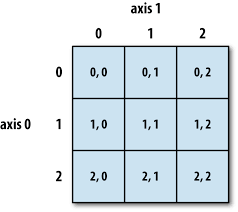

This is an example for 2-dimensional arrays
* It works the same also for more dimensions

#### Indexing and slices higher-dimensional arrays

Higher dimensional arrays can be indexed and sliced in several ways

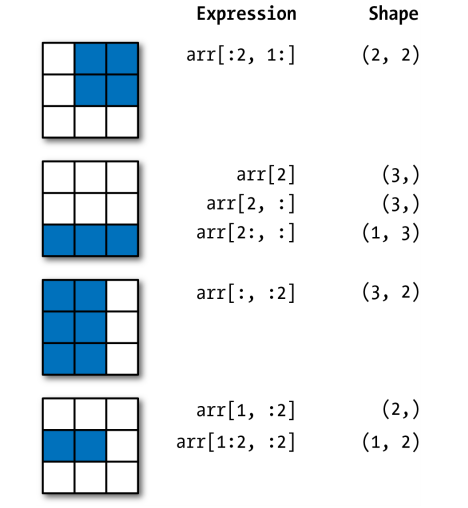

In [381]:
print(arr2d)
print()
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 2 3]
 [4 5 6]]


We have sliced it along axis 0, the first axis (the rows). 
* A slice, therefore, selects a range of elements along an axis. 
* You can pass multiple slices just like you can pass multiple indexes

In [382]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [383]:
arr2d[:2, 1:] = 0 #  assigning to a slice expression assigns to the whole selection
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

We can also use a Boolean expression to select elements in an array
* the ones satisfying the Boolean expression

In [384]:
data = np.random.randn(7, 4)
print('Data\n',data)
data2=data[ data > 0]
print('Data2\n',data2)

Data
 [[ 1.04019627 -0.53404167  0.50386653  0.21058542]
 [-0.62553279  1.00199767 -0.35749089 -1.42116447]
 [-1.19234466  0.02979696 -0.20658177  0.2610294 ]
 [ 0.52019953 -0.65822194  0.34888322 -0.52069934]
 [ 0.85385405  0.08044017 -0.96134838  0.00479192]
 [-0.41710353  0.63186153 -0.25541502 -0.90354778]
 [ 0.74847869  0.05442722  1.71244182  2.00552219]]
Data2
 [1.04019627 0.50386653 0.21058542 1.00199767 0.02979696 0.2610294
 0.52019953 0.34888322 0.85385405 0.08044017 0.00479192 0.63186153
 0.74847869 0.05442722 1.71244182 2.00552219]


## Mathematical and Statistical Methods
Arrays have a number of methods for 
* computing mathematical functions/statistics 
  * on the entire array 
  * on part of the array

### Reshaping an array

Arrays have a convenient method `reshape` to 
* change their dimensions without modifying the data
* Remember: we compute a view. 
  * no data is actually copied
  * any change to the view is observed also in the orginal data

For example, we can transform
* a 1-dimensional array with 15 entries
* into a 2-dimensional 3x5 array (a matrix)

In [385]:
arr = np.arange(15)
print("1-dimensional array arr\n",arr)
m=arr.reshape((3, 5))
print("2-dimensional matrix m\n",m)

print()
#m is a view!
m[0,0]=100
print("1-dimensional array arr after modifiyng the view m\n",arr)
print("2-dimensional matrix m after modifiyng the view m\n",m)

1-dimensional array arr
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2-dimensional matrix m
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

1-dimensional array arr after modifiyng the view m
 [100   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
2-dimensional matrix m after modifiyng the view m
 [[100   1   2   3   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]]


### Transposing Arrays
Arrays have the transpose method and also the special T attribute
* This is just a special reshape
* we compute a view - no actual copy

In [386]:
arr = np.arange(15)
m = arr.reshape(3,5)
print("Matrix m\n",m)
print()
print("Transposed matrix using T\n",m.T)
print()
print("Transposed matrix transpose()\n",m.transpose())

Matrix m
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Transposed matrix using T
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]

Transposed matrix transpose()
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


### Matrix product
If you want to [multply two matrices](https://en.wikipedia.org/wiki/Matrix_multiplication) you can use the `dot` function
* not just multiplying element-wise their elements

In [387]:
m1 = np.arange(4).reshape(2,2)
m2 = (np.arange(4)+4).reshape(2,2)
#np.dot(m.T,m)
print(m1)
print(m2)
np.dot(m1,m2)

[[0 1]
 [2 3]]
[[4 5]
 [6 7]]


array([[ 6,  7],
       [26, 31]])

You can also multiplty a matrix by its transpose as:

In [388]:
np.dot(m.T,m)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

### Square root
_np.sqrt()_ computes the square root of each element. Equivalent to m ** 0.5

In [389]:
 np.sqrt(m1)

array([[0.        , 1.        ],
       [1.41421356, 1.73205081]])

### Aggregations
Aggregations (often called reductions) 
* like sum, mean, and standard deviation std of all elements in the matrix/array 
8 can be computed by using the corresponding array method

In [390]:
print('matrix\n',m)
print('mean',m.mean())
print('sum',m.sum())
print('standard deviation',m.std())

print()
print('array\n',arr)
print('mean',arr.mean())
print('sum',arr.sum())
print('standard deviation',arr.std())

matrix
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
mean 7.0
sum 105
standard deviation 4.320493798938574

array
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
mean 7.0
sum 105
standard deviation 4.320493798938574


Functions like `sum`  and `mean`
* can be computed for each dimension rather than cumulatively 
* we do this specifying the `axis` (the dimension) over which we want to iterate

For example, using 
* `axis=0` we compute the sum/mean/std for each column of M
* `axis=1` we compute the sum/mean/std for each row of M

In [391]:
print('matrix\n',m)
print()

print('sum of each column\n',m.sum(axis=0))
print('mean of each column\n',m.mean(axis=0))
print('standard deviation of each column\n',m.std(axis=0))
print()

print('sum of each row\n',m.sum(axis=1))
print('mean of each row\n',m.mean(axis=1))
print('standard deviation of each row\n',m.std(axis=1))

matrix
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

sum of each column
 [15 18 21 24 27]
mean of each column
 [5. 6. 7. 8. 9.]
standard deviation of each column
 [4.0824829 4.0824829 4.0824829 4.0824829 4.0824829]

sum of each row
 [10 35 60]
mean of each row
 [ 2.  7. 12.]
standard deviation of each row
 [1.41421356 1.41421356 1.41421356]


### Sorting
Similarly to lists, 
* arrays can be sorted using the `sort()` method

In [392]:
arr = np.random.randn(8)
arr

array([ 0.77517187, -0.57794365,  0.52388016,  0.11990098, -0.91398741,
       -0.77454811,  0.9850178 ,  1.2276625 ])

In [393]:
arr.sort()
arr

array([-0.91398741, -0.77454811, -0.57794365,  0.11990098,  0.52388016,
        0.77517187,  0.9850178 ,  1.2276625 ])

Multidimensional arrays are sorted by iteratively sorting each dimentsion. 
E.g. in matrices we 
* Sort the elements within each row
* We sort the rows using the lexicographical order

In [394]:
arr2d = np.random.randn(5, 3)
arr2d

array([[ 0.32304394, -0.405408  , -0.88035933],
       [-0.41046448,  0.64333839, -2.15514567],
       [-0.32851197, -0.81053254, -1.31833537],
       [-0.48574879, -0.05708431, -1.74431315],
       [ 0.09463866, -2.03198707, -1.01619466]])

In [395]:
arr2d.sort()
arr2d

array([[-0.88035933, -0.405408  ,  0.32304394],
       [-2.15514567, -0.41046448,  0.64333839],
       [-1.31833537, -0.81053254, -0.32851197],
       [-1.74431315, -0.48574879, -0.05708431],
       [-2.03198707, -1.01619466,  0.09463866]])

But we can also sort single dimensions

In [396]:
arr2d = np.random.randn(5, 3)
print(arr2d)
print()
arr2d.sort(1)
print(arr2d)

[[-1.18825368 -0.49510255 -1.06036069]
 [-0.35593887 -0.74450505  1.34175865]
 [ 0.43076791 -1.86069178  0.95888272]
 [-2.07998264  0.76563701 -0.0071658 ]
 [-0.32318784 -0.06621256  0.62518095]]

[[-1.18825368 -1.06036069 -0.49510255]
 [-0.74450505 -0.35593887  1.34175865]
 [-1.86069178  0.43076791  0.95888272]
 [-2.07998264 -0.0071658   0.76563701]
 [-0.32318784 -0.06621256  0.62518095]]


### Unique
NumPy has some basic set operations for one-dimensional ndarrays. 
* The most common one is `np.unique()` 
  * returns the sorted unique values in an array

In [397]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))

# pure Python alternative:
# sorted(set(names))

['Bob' 'Joe' 'Will']


# Pandas
Pandas is another popular Python package. 
* It is built on top of NumPy (it used data structures based on arrays)

Pandas provides rich data structures and functions designed to 
* make it easy, flexible and efficient working with structured data (CSV files, spreadsheets, databases)

E.g., Pandas allows to easily perform complex data manipulation like 
* _reshape_ and _slice_
* data aggregations 
* data selection

## Install and import the Pandas module

The first time you run this notebook you might have to install Pandas using the following script:

In [398]:
#import sys
#!{sys.executable} -m pip install pandas

The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [399]:
#import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt

## Series

A Series is a one-dimensional list-like object containing 
* an ndarray containing the actual data
* an associated ndarray of labels with one label (or index) per data element

Intuitively, you can see a Series as 
* a dictionary 
* or, in its simplest form, as a 1-dimensional array/list

The simplest form of Series consists of 
* an array of data, 
* an implicit array of labels containing the position of each element in the main array

In [400]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

We note that 
* The string representation of a Series shows the index on the left and the values on the right
  * Obtained redefining the method `__str__` of the class Series, as you know from the previous class


Since we did not specify an index for the data, 
* a default array of labels containing integers from 0 to N - 1 is created.
  * each element is labeled with its own position in the array

If you are interested only in one of the two arrays, just use

In [401]:
print('Series index: ',obj.index)
print('Series values: ',obj.values)

Series index:  RangeIndex(start=0, stop=4, step=1)
Series values:  [ 4  7 -5  3]


Let's now create a Series whose entries are labelled by characters.

In [402]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

### Indexing, selection, and filtering

Similarly to Python dictionaries, 
* you can use values in the index to select values in the main array

In [403]:
print("obj2['d'] = ",obj2['d'])

obj2['d'] = 6
print("obj2['d']  (after obj2['d'] = 6) =  ",obj2['d'])
      
print("obj2[['c', 'a', 'd']] = \n",obj2[['c', 'a', 'd']])

obj2['d'] =  4
obj2['d']  (after obj2['d'] = 6) =   6
obj2[['c', 'a', 'd']] = 
 c    3
a   -5
d    6
dtype: int64


Indexes are preserved by NumPy array operations like
* filtering with a boolean array, scalar multiplication, application of math functions

In [404]:
print("obj2\n",obj2)
print()
print("NumPy operation obj2[obj2 > 0] \n",obj2[obj2 > 0])
print()
print("NumPy operation obj2 * 2 \n",obj2 * 2)
print()
print("NumPy operation np.exp(obj2) \n",np.exp(obj2))

obj2
 d    6
b    7
a   -5
c    3
dtype: int64

NumPy operation obj2[obj2 > 0] 
 d    6
b    7
c    3
dtype: int64

NumPy operation obj2 * 2 
 d    12
b    14
a   -10
c     6
dtype: int64

NumPy operation np.exp(obj2) 
 d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


You create a Series using a dict and a list as index
* the list contains the keys of interest from the dict

In [405]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4 

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

We note that
* 3 values found in sdata were placed in the appropriate locations, 
* but since no value for `'California'` was found, it got a `NaN` (not a number) 
  * which is considered in pandas to mark missing/NA/NaN values
  
The `isnull` and `notnull` functions in pandas detect such missing values:

In [406]:
pd.isnull(obj4) 

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [407]:
pd.notnull(obj4) 

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

E.g., if you want to use only the non-null values you do:

In [408]:
obj4[pd.notnull(obj4)]

Ohio      35000.0
Oregon    16000.0
Texas     71000.0
dtype: float64

## DataFrame
* A Series can be seen as a table with 1 column
* A DataFrame is a proper table with more columns
  * A series is just a simpler version of a dataframe
  * A dataframe is a series with 'more main arrays' (one per column)
  * DataFrames are the most important objects in pandas

### Creating DataFrame objects

The most common way to build a dataframe is by 
* using a dict containing lists or arrays of same length
  * each key/label becomes a column
    * if you specify a subset of key/labels, then only the corresponding column will be added
    * if you pass a column that isn’t contained in data, it will get NA values
  * each list/array element is a value for that column

In [409]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [410]:
frame = pd.DataFrame(data,columns=['state','pop','nonExistingColumn'])
frame

,state,pop,nonExistingColumn
0,Ohio,1.5,NaN
1,Ohio,1.7,NaN
2,Ohio,3.6,NaN
3,Nevada,2.4,NaN
4,Nevada,2.9,NaN
5,Nevada,3.2,NaN


In [411]:
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


We see above that the DataFrame also has an index/labels array
* the first element in each row
  * in this case we have the default array of labels show
  * but specific ones can be given explicitly

In [412]:
frame1 = pd.DataFrame(data, index = ['a','b','c','d','e','f'] )
frame1

,state,year,pop
a,Ohio,2000,1.5
b,Ohio,2001,1.7
c,Ohio,2002,3.6
d,Nevada,2001,2.4
e,Nevada,2002,2.9
f,Nevada,2003,3.2


A column of a DataFrame can be retrieved as a Series 
* by dict-like notation 
* or by attribute:

In [413]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four', 'five','six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [414]:
#Select single column or sequence of columns from the DataFrame
frame2['state'] # by dict-like notation 

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [415]:
frame2.state # by attribute

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

### Updating DataFrame objects

Values is a dataframe column can be modified by assignment. 
* If we assign a single value to a column, then the value is broadcasted to the whole column
* E.g., the empty `debt` column can be initialized to 16.5 as:

In [416]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


When assigning lists or arrays to a column, the value’s length must match the length
of the DataFrame. 

In [417]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


Creating and deleting columns
* Assigning a column that doesn’t exist will create a new column. 
* The del keyword will delete columns as with a dict

In [418]:
frame2['eastern'] =  (frame2.state == 'Ohio')
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,0.0,True
two,2001,Ohio,1.7,1.0,True
three,2002,Ohio,3.6,2.0,True
four,2001,Nevada,2.4,3.0,False
five,2002,Nevada,2.9,4.0,False
six,2003,Nevada,3.2,5.0,False


In [419]:
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


We have just seen how to __delete columns__

In order to __delete rows__ 
* you just use the `drop` method
* BEWARE: __this will create a proper copy of the dataframe: a new object__

In [420]:
frame100 = frame2.drop(['five'])
frame100

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
six,2003,Nevada,3.2,5.0


In [421]:
frame100['year']=100
frame100

,year,state,pop,debt
one,100,Ohio,1.5,0.0
two,100,Ohio,1.7,1.0
three,100,Ohio,3.6,2.0
four,100,Nevada,2.4,3.0
six,100,Nevada,3.2,5.0


In [422]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


Instead
* The column returned when indexing a DataFrame is a view on the underlying data
*  Thus, any modification to the Series will be reflected in the DataFrame.
   * The column can be explicitly copied using the Series’s copy method.

If you create a dataframe using a 2-levels nested dictionary
* The keys of the outer dictionary will be used for the column names
* The keys of the inner dictionary will be used for the index names

In [423]:
inner_dict1 ={           2001: 2.4, 2002: 2.9}
inner_dict2 ={2000: 1.5, 2001: 1.7, 2002: 3.6}

outer_dict = {'Nevada': inner_dict1, 'Ohio': inner_dict2}
frame3 = pd.DataFrame(outer_dict)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Similarly to multi-dimensional arrays, 
* you can transpose the result:

In [424]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


You can also choose which keys of the inner dict (i.e. which indexes) to use
* we are not using 2001
* we are using a non-existing index 2003

In [425]:
pd.DataFrame(outer_dict, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


Like Series, the values attribute returns the data contained in the DataFrame as a 2D
ndarray

In [426]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

### Indexing, selection, and filtering


Indexing into a DataFrame is for retrieving one or more columns:

In [427]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [428]:
data['two'] #retrieving one column

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [429]:
data[['three', 'one']] #retrieving two columns

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


However, if you select by slicing or Boolean expression, it is interpreted as a selection on __rows__

In [430]:
data[:2] #rows by slicing 

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [431]:
data[data['three'] > 5]  #rows by a boolean array

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### Easier/more intuitive selection using loc and iloc

The `iloc` field of dataframes allows to select subsets or rows and columns using NumPy-like notation
* The iloc indexer for Pandas Dataframe is used for integer-location based indexing / selection by position.
* `data.iloc[row selection, column selection]`

In [432]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [433]:
data.iloc[1]   # second row

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [434]:
data.iloc[-1]  # last row

one      12
two      13
three    14
four     15
Name: New York, dtype: int64

In [435]:
data.iloc[:,1] # first column

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [436]:
# Multiple row and column selections using iloc and DataFrame
data.iloc[:, 0:2] # first two columns of data frame with all rows

,one,two
Ohio,0,1
Colorado,4,5
Utah,8,9
New York,12,13


In [437]:
data.iloc[[1, 2], [3, 0, 1]] # 2nd 3rd row + 4th 1st 2nd columns.

,four,one,two
Colorado,7,4,5
Utah,11,8,9


The Pandas `loc` indexer works the same
* but you can use column/index names
    a.) Selecting rows by label/index
    b.) Selecting rows with a boolean / conditional lookup
The loc indexer is used with the same syntax as iloc: data.loc[row selection, column selection] .

In [438]:
print(data.loc[['Colorado','Ohio']]) #List of labels index.
print()
print(data.loc[:,'one']) # first column of data frame
print()

# Multiple row and column selections using loc and DataFrame
print(data.loc[['Colorado','Ohio'], ['one','four']])  # 'Colorado','Ohio' row + 'one','four'columns.

          one  two  three  four
Colorado    4    5      6     7
Ohio        0    1      2     3

Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int64

          one  four
Colorado    4     7
Ohio        0     3


### Arithmetics and Data Alignment
When summing 2 dataframes, is their sets of indexes is not equal, 
* the resulting dataframe will contain the union of the two indexes, 
* summing only the rows with same index
* while rows with indexes present in only one dataframe will be just copied
* This is known as __data alignment__
  * Intuitively, NA-rows (or 0-rows, see belw) are added to the dataframe to make them have same indexes

In [439]:
df1 = pd.DataFrame(np.arange(4.).reshape((2, 2)), columns=list('ab'),
                   index=['Texas', 'Colorado'])
df1

,a,b
Texas,0.0,1.0
Colorado,2.0,3.0


In [440]:
df2 = pd.DataFrame((np.arange(3.)+4).reshape((1, 3)), columns=list('abc'),
                   index=['Texas'])
df2

,a,b,c
Texas,4.0,5.0,6.0


In [441]:
df1 + df2

,a,b,c
Colorado,NaN,NaN,NaN
Texas,4.0,6.0,NaN


You might want to fill with a defau;t value 
* when a combination 'row,column' is found in at least one dataframe
* 'Colorado,c' remains NA because it does not appear in any dataframe

In [442]:
df1.add(df2, fill_value=0)

,a,b,c
Colorado,2.0,3.0,NaN
Texas,4.0,6.0,6.0


### A digression: lambda functions

**Take material from functions**

### Function application and mapping
NumPy ufuncs (element-wise array methods) work fine with pandas objects:

In [443]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.017912,-1.355016,-0.786477
Ohio,-1.707094,-1.329844,-1.148968
Texas,2.319852,-0.198977,0.315572
Oregon,1.918391,0.739770,-0.887067


In [444]:
np.abs(frame)

,b,d,e
Utah,0.017912,1.355016,0.786477
Ohio,1.707094,1.329844,1.148968
Texas,2.319852,0.198977,0.315572
Oregon,1.918391,0.739770,0.887067


But you can also apply any function thought for 1d arrays to each column or row.

In [445]:
f = lambda arr: arr.max()
frame.apply(f)

b    2.319852
d    0.739770
e    0.315572
dtype: float64

In [446]:
frame.apply(f, axis='columns')

Utah      0.017912
Ohio     -1.148968
Texas     2.319852
Oregon    1.918391
dtype: float64

Element-wise Python functions can be used, too. 

In [447]:
times_ten = lambda x: x*10
frame.applymap(times_ten)

,b,d,e
Utah,0.179124,-13.550158,-7.864772
Ohio,-17.070942,-13.298436,-11.489676
Texas,23.198518,-1.989766,3.155718
Oregon,19.183907,7.397698,-8.870666


In [448]:
frame['e'].map(times_ten)

Utah      -7.864772
Ohio     -11.489676
Texas      3.155718
Oregon    -8.870666
Name: e, dtype: float64

### Sorting
To sort
lexicographically by row or column index, use the sort_index method, which returns
a new, sorted object:

In [449]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [450]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [451]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['three', 'two','one'],
                     columns=['c', 'a', 'b'])
frame

,c,a,b
three,0,1,2
two,3,4,5
one,6,7,8


In [452]:
frame.sort_index() # sorting by the index

,c,a,b
one,6,7,8
three,0,1,2
two,3,4,5


In [453]:
frame.sort_index(axis=1,ascending=False) #  sorting  by column index  in descending order

,c,b,a
three,0,2,1
two,3,5,4
one,6,8,7


### Summarizing and Computing Descriptive Statistics
Series and Dataframes offer methods for computing comming mathematical/statistical methods. 
* Most of these are reductions or summary statistics, 
  * methods that compute
    * For Series: a single value (e.g. sum or mean) 
    * For DataFrames: a Series of values from the rows or columns. 

In [454]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [455]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [456]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Note that NaN are ignored
* `9.25/3 = 3.083333`

In [457]:
df.mean()

one    3.083333
two   -2.900000
dtype: float64

idxmin and idxmax, return 
* the index containing the minimum or maximum values

In [458]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [459]:
df.idxmax()

one    b
two    d
dtype: object

The method `describe` computes a number of summary statistics in one shot:

In [460]:
df.describe() #Compute set of summary statistics for Series or each DataFrame column

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


# Simple application to Italian COVID data - load/manipulate remote CSV file

Using Python and pandas, it is easy to read data from text files

One convenient feature is _type inference_
* You don’t need to specify which columns are numeric, integer, boolean, or string. 
* Handling dates and other custom types requires a bit more effort, though. 

Do you remember the [Italian COVID CSV data used in class 4?](https://htmlpreview.github.io/?https://github.com/andrea-vandin/IntroToPython20192020/blob/master/jupyter/jupyterNotebooks/html/04ControlAndRepetitionStatements.html)
* Let's read one such online CSV file
* and load it into a DataFrame
* __You just need 1 instruction__

In [461]:
#Load delimited data from a file, URL, or file-like object. Use comma as default delimiter
covid_data = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

In [462]:
covid_data.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,...,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,...,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,...,9587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,...,12014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,...,15695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [463]:
covid_data.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
333,2021-01-22T17:00:00,ITA,21691,2390,24081,477972,502053,-14515,13633,1855127,...,30431493,16279588.0,NaN,144.0,NaN,NaN,2435519.0,6335.0,29608567.0,822926.0
334,2021-01-23T17:00:00,ITA,21403,2386,23789,475045,498834,-3219,13331,1871189,...,30717824,16367107.0,NaN,174.0,NaN,NaN,2447861.0,7324.0,29759716.0,958108.0
335,2021-01-24T17:00:00,ITA,21309,2400,23709,475569,499278,444,11629,1882074,...,30934035,16443404.0,NaN,120.0,NaN,NaN,2458857.0,7956.0,29893362.0,1040673.0
336,2021-01-25T17:00:00,ITA,21424,2421,23845,467785,491630,-7648,8562,1897861,...,31060966,16494329.0,NaN,150.0,NaN,NaN,2467120.0,8252.0,29962599.0,1098367.0
337,2021-01-26T17:00:00,ITA,21355,2372,23727,458690,482417,-9213,10593,1917117,...,31317253,16567955.0,NaN,162.0,NaN,NaN,2476249.0,9707.0,30087654.0,1229599.0


In [464]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    338 non-null    object 
 1   stato                                   338 non-null    object 
 2   ricoverati_con_sintomi                  338 non-null    int64  
 3   terapia_intensiva                       338 non-null    int64  
 4   totale_ospedalizzati                    338 non-null    int64  
 5   isolamento_domiciliare                  338 non-null    int64  
 6   totale_positivi                         338 non-null    int64  
 7   variazione_totale_positivi              338 non-null    int64  
 8   nuovi_positivi                          338 non-null    int64  
 9   dimessi_guariti                         338 non-null    int64  
 10  deceduti                                338 non-null    int64 

In [465]:
covid_data['data']

0      2020-02-24T18:00:00
1      2020-02-25T18:00:00
2      2020-02-26T18:00:00
3      2020-02-27T18:00:00
4      2020-02-28T18:00:00
              ...         
333    2021-01-22T17:00:00
334    2021-01-23T17:00:00
335    2021-01-24T17:00:00
336    2021-01-25T17:00:00
337    2021-01-26T17:00:00
Name: data, Length: 338, dtype: object

In [466]:
#Get the last day in the CSV file
last_day = covid_data['data'].iloc[-1]
last_day

'2021-01-26T17:00:00'

Using DataFrame’s to_csv method, we can write the data out to a comma-separated file
* Let's create a CSV file containing only the data about the latest day

In [467]:
print(covid_data.data == last_day) # Evaluates to True for the rows that satisfy this guard
cov_regions_last_day = covid_data[covid_data.data == last_day] # Get all the rows that satisfy the guard above
cov_regions_last_day

0      False
1      False
2      False
3      False
4      False
       ...  
333    False
334    False
335    False
336    False
337     True
Name: data, Length: 338, dtype: bool


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
337,2021-01-26T17:00:00,ITA,21355,2372,23727,458690,482417,-9213,10593,1917117,...,31317253,16567955.0,NaN,162.0,NaN,NaN,2476249.0,9707.0,30087654.0,1229599.0


In [468]:
cov_regions_last_day.to_csv('covid_lastday.csv')

# Simple application to Yahoo! Finance stock prices - %change, correlation, covariance
Let’s consider some DataFrames of stock prices obtained from
Yahoo! Finance:

In [469]:
# install Yahoo! Finance market data downloader for Pandas
#import sys 
#!{sys.executable} -m pip install  pandas-datareader
import pandas_datareader.data as web

In [470]:
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
all_data['AAPL']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-29,24.334999,23.587500,23.697500,24.334999,257666000.0,22.545681
2016-02-01,24.177500,23.850000,24.117500,24.107500,163774000.0,22.334911
2016-02-02,24.010000,23.570000,23.855000,23.620001,149428800.0,21.883259
2016-02-03,24.209999,23.520000,23.750000,24.087500,183857200.0,22.316381
2016-02-04,24.332500,23.797501,23.965000,24.150000,185886800.0,22.495693
...,...,...,...,...,...,...
2021-01-21,139.669998,133.589996,133.800003,136.869995,120529500.0,136.869995
2021-01-22,139.850006,135.020004,136.279999,139.070007,113907200.0,139.070007
2021-01-25,145.089996,136.539993,143.070007,142.919998,157611700.0,142.919998


In [471]:
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-01-29,22.545681,100.381676,50.271385,742.950012
2016-02-01,22.334911,100.413864,49.924614,752.000000
2016-02-02,21.883259,98.893547,48.364185,764.650024
2016-02-03,22.316381,100.325394,47.597656,726.950012
2016-02-04,22.495693,102.682281,47.451664,708.010010


In [472]:
price.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-01-21,136.869995,131.649994,224.970001,1891.250000
2021-01-22,139.070007,118.610001,225.949997,1901.050049
2021-01-25,142.919998,118.580002,229.529999,1899.400024
2021-01-26,143.160004,122.489998,232.330002,1917.239990
2021-01-27,143.479996,122.459999,239.839996,1863.959961


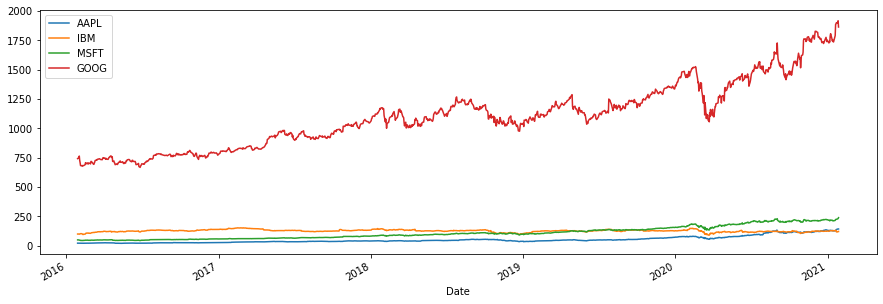

In [473]:
# plotting price dataframe. 
price.plot(figsize=(15,5))

Now we compute the percent changes of the prices
* % change from previous value

In [474]:
returns = price.pct_change() # Computes the percentage change from the immediately previous row by default. This is useful in comparing the percentage of change in a time series of elements.
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-01-21,0.036658,0.012069,0.002808,0.002305
2021-01-22,0.016074,-0.099050,0.004356,0.005182
2021-01-25,0.027684,-0.000253,0.015844,-0.000868
2021-01-26,0.001679,0.032973,0.012199,0.009392
2021-01-27,0.002235,-0.000245,0.032325,-0.027790


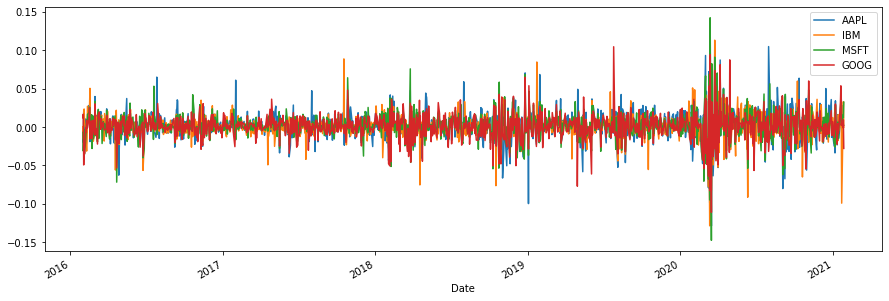

In [475]:
returns.plot(figsize=(15,5))

DataFrames offer two methods for comptuing 
* the correlation among the elements in the DataFrame (`corr`)
* the covariance matrxi of the DataFrame (`cov`)

In [476]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.452826,0.711774,0.653857
IBM,0.452826,1.000000,0.539102,0.503469
MSFT,0.711774,0.539102,1.000000,0.775540
GOOG,0.653857,0.503469,0.775540,1.000000


In [477]:
returns.corr().style.background_gradient(cmap='Reds')

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.452826,0.711774,0.653857
IBM,0.452826,1.000000,0.539102,0.503469
MSFT,0.711774,0.539102,1.000000,0.775540
GOOG,0.653857,0.503469,0.775540,1.000000


In [478]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000356,0.000141,0.000234,0.000205
IBM,0.000141,0.000272,0.000154,0.000138
MSFT,0.000234,0.000154,0.000302,0.000224
GOOG,0.000205,0.000138,0.000224,0.000276


# More complex application to Italian COVID data - Advanced Plotting with pandas 
Pandas offers a number of plotting methods for DataFrame objects

The Italian Civil Protection Department publishes everyday [data on the status of the COVID-19 epidemy in Italy](https://github.com/pcm-dpc/COVID-19)

The repository contains
- ‘dati-andamento-nazionale’ (data relating to the national trend of SARS-CoV-2 spread), 
- ‘dati-regioni’ (data relating to the regional trend of SARS-CoV-2 spread),
- ‘dati-province’ (data relating to the provincial trend of SARS-CoV-2 spread) 


In [479]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Line Plots
Series and DataFrame each have a plot method for making many different types of plots
* By default, they make line plots 

In [480]:
# load data relating to the national trend of SARS-CoV-2 spread on Pandas DataFrame
url_dpc_nazionale = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')

covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
covid_italy.tail(2)

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
data,,,,,,,,,,,,,,,,,,,,,
2021-01-25 17:00:00,ITA,21424,2421,23845,467785,491630,-7648,8562,1897861,85881,...,31060966,16494329.0,NaN,150.0,NaN,NaN,2467120.0,8252.0,29962599.0,1098367.0
2021-01-26 17:00:00,ITA,21355,2372,23727,458690,482417,-9213,10593,1917117,86422,...,31317253,16567955.0,NaN,162.0,NaN,NaN,2476249.0,9707.0,30087654.0,1229599.0


In [481]:
from datetime import datetime

#Let's get the data of interest ('totale_positivi','dimessi_guariti','deceduti')
covid_italy_filter = covid_italy[['totale_positivi','dimessi_guariti','deceduti' ]]

covid_italy_filter

,totale_positivi,dimessi_guariti,deceduti
data,,,
2020-02-24 18:00:00,221,1,7
2020-02-25 18:00:00,311,1,10
2020-02-26 18:00:00,385,3,12
2020-02-27 18:00:00,588,45,17
2020-02-28 18:00:00,821,46,21
...,...,...,...
2021-01-22 17:00:00,502053,1855127,84674
2021-01-23 17:00:00,498834,1871189,85162
2021-01-24 17:00:00,499278,1882074,85461


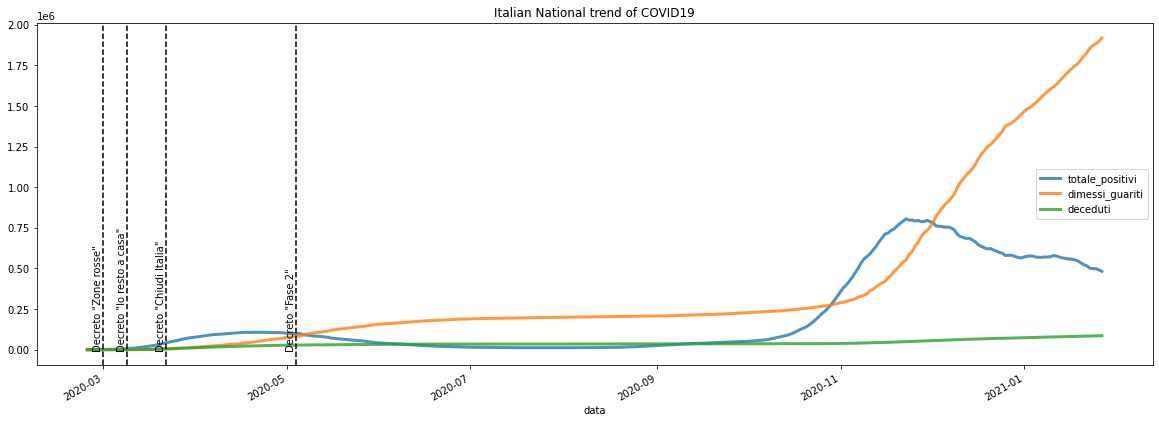

In [482]:
# We now create the plot
covid_italy_filter.plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 

# and add annotations
annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
               datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
               datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
               datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
for d,a in annotations.items():
    plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
    plt.axvline(d, color='k', linestyle='--')   
    
plt.show()

Eliminiamo un certo numero di righe cambiando asse delle y

## Bar Plots
Making bar plots instead of line plots is as simple as passing 
* `kind='bar'` (for vertical bars) or 
* `kind='barh'` (for horizontal bars).

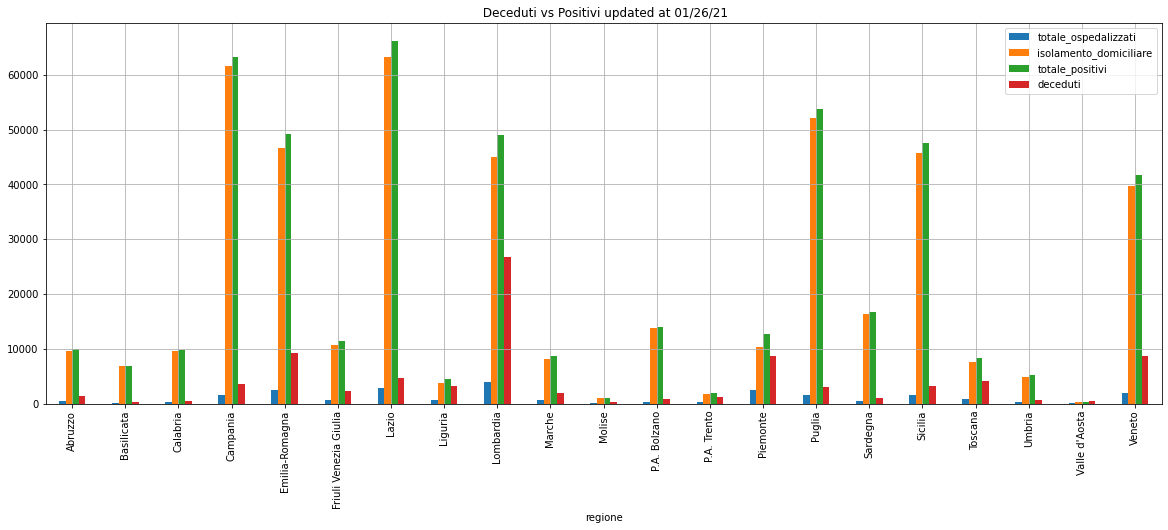

In [483]:
# load data relating to the regional trend of SARS-CoV-2 spread
url_dpc_regioni = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
covid_regions = pd.read_csv(url_dpc_regioni)
covid_regions.index = pd.to_datetime(covid_regions.data)
covid_regions = covid_regions.rename(columns={'denominazione_regione': 'regione'})

# get last day data relating to the regional trend of SARS-CoV-2 spread
cov_regions_last_day = covid_regions[covid_regions.data ==  covid_regions.data.iloc[-1]] # get last day data
cov_regions_last_day.index = cov_regions_last_day.regione

#drop some unnecessary columns
#cov_regions_last_day = cov_regions_last_day.drop(['lat','long','codice_regione',"stato","regione","note_it","note_en"], axis = 1)
cov_regions_last_day = cov_regions_last_day.drop(['lat','long','codice_regione',"stato","regione","note"], axis = 1)

#Let's get the data of interest (Deceduti vs Positivi) and plot them
title = f" Deceduti vs Positivi updated at {covid_regions.index[-1].strftime('%D')}"
#Here we are using 'bar!'
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']].plot(kind='bar', figsize =(20,7),grid=True,title=title)

plt.show()

### Stacked bar plots
Stacked bar plots are created from a DataFrame by passing `stacked=True`, resulting in
the value in each row being stacked together

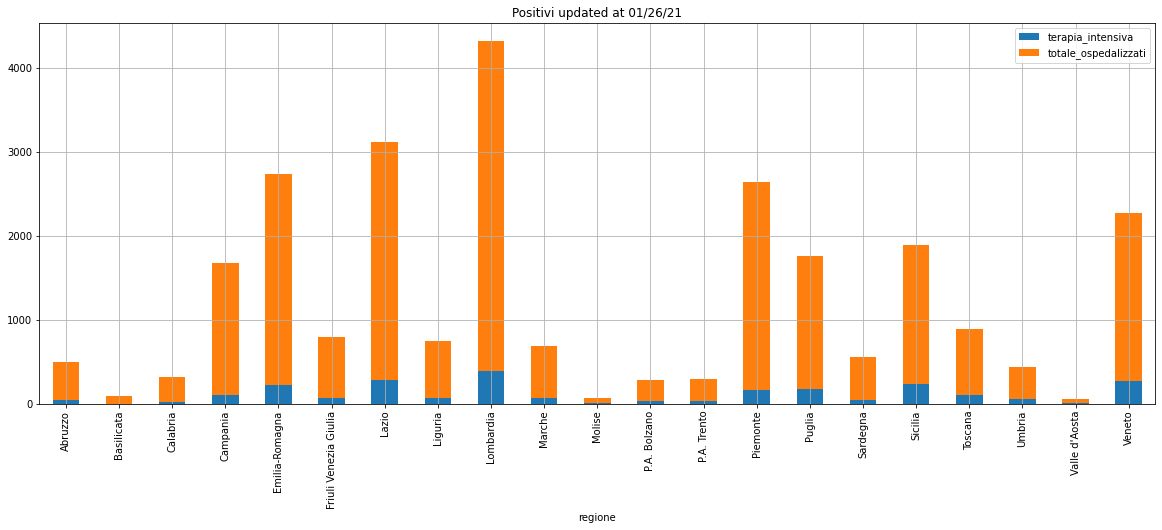

In [484]:
#Let's get the data of interest ('terapia_intensiva','totale_ospedalizzati') and plot them on stacked bar
title = f"Positivi updated at {covid_regions.index[-1].strftime('%D')}"
cov_regions_last_day[['terapia_intensiva','totale_ospedalizzati']].plot(kind='bar', stacked=True, figsize =(20,7),grid=True,title=title)

plt.show()

## Scatter Matrix 
In exploratory data analysis it is helpful to look at how pairs of variables relate to each other
* we are interested in _plots relating pairs of variables_
* this is known as a _pairs plot_ or _scatter plot matrix_. 

Making such a plot from scratch is a bit of work. 
* Luckily pandas has a `scatter_matrix` function for creating one from a DataFrame. 
* It also supports placing histograms or density plots of each variable along the diagonal.

In [485]:
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
covid_italy.tail()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
data,,,,,,,,,,,,,,,,,,,,,
2021-01-22 17:00:00,ITA,21691,2390,24081,477972,502053,-14515,13633,1855127,84674,...,30431493,16279588.0,NaN,144.0,NaN,NaN,2435519.0,6335.0,29608567.0,822926.0
2021-01-23 17:00:00,ITA,21403,2386,23789,475045,498834,-3219,13331,1871189,85162,...,30717824,16367107.0,NaN,174.0,NaN,NaN,2447861.0,7324.0,29759716.0,958108.0
2021-01-24 17:00:00,ITA,21309,2400,23709,475569,499278,444,11629,1882074,85461,...,30934035,16443404.0,NaN,120.0,NaN,NaN,2458857.0,7956.0,29893362.0,1040673.0
2021-01-25 17:00:00,ITA,21424,2421,23845,467785,491630,-7648,8562,1897861,85881,...,31060966,16494329.0,NaN,150.0,NaN,NaN,2467120.0,8252.0,29962599.0,1098367.0
2021-01-26 17:00:00,ITA,21355,2372,23727,458690,482417,-9213,10593,1917117,86422,...,31317253,16567955.0,NaN,162.0,NaN,NaN,2476249.0,9707.0,30087654.0,1229599.0


In [486]:
#drop unnecessary columns
#covid_italy.drop(columns=["stato","note"], inplace=True)
#covid_italy.drop(columns=["stato","casi_da_sospetto_diagnostico","casi_da_screening","note","ingressi_terapia_intensiva","note_test","note_casi","totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)
covid_italy.drop(columns=["note_test","note_casi"], inplace=True)
#covid_italy.drop(columns=["note_test","note_casi","totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)


covid_italy['totale_casi']

data
2020-02-24 18:00:00        229
2020-02-25 18:00:00        322
2020-02-26 18:00:00        400
2020-02-27 18:00:00        650
2020-02-28 18:00:00        888
                        ...   
2021-01-22 17:00:00    2441854
2021-01-23 17:00:00    2455185
2021-01-24 17:00:00    2466813
2021-01-25 17:00:00    2475372
2021-01-26 17:00:00    2485956
Name: totale_casi, Length: 338, dtype: int64

In [487]:
covid_italy['terapia_intensiva']

data
2020-02-24 18:00:00      26
2020-02-25 18:00:00      35
2020-02-26 18:00:00      36
2020-02-27 18:00:00      56
2020-02-28 18:00:00      64
                       ... 
2021-01-22 17:00:00    2390
2021-01-23 17:00:00    2386
2021-01-24 17:00:00    2400
2021-01-25 17:00:00    2421
2021-01-26 17:00:00    2372
Name: terapia_intensiva, Length: 338, dtype: int64

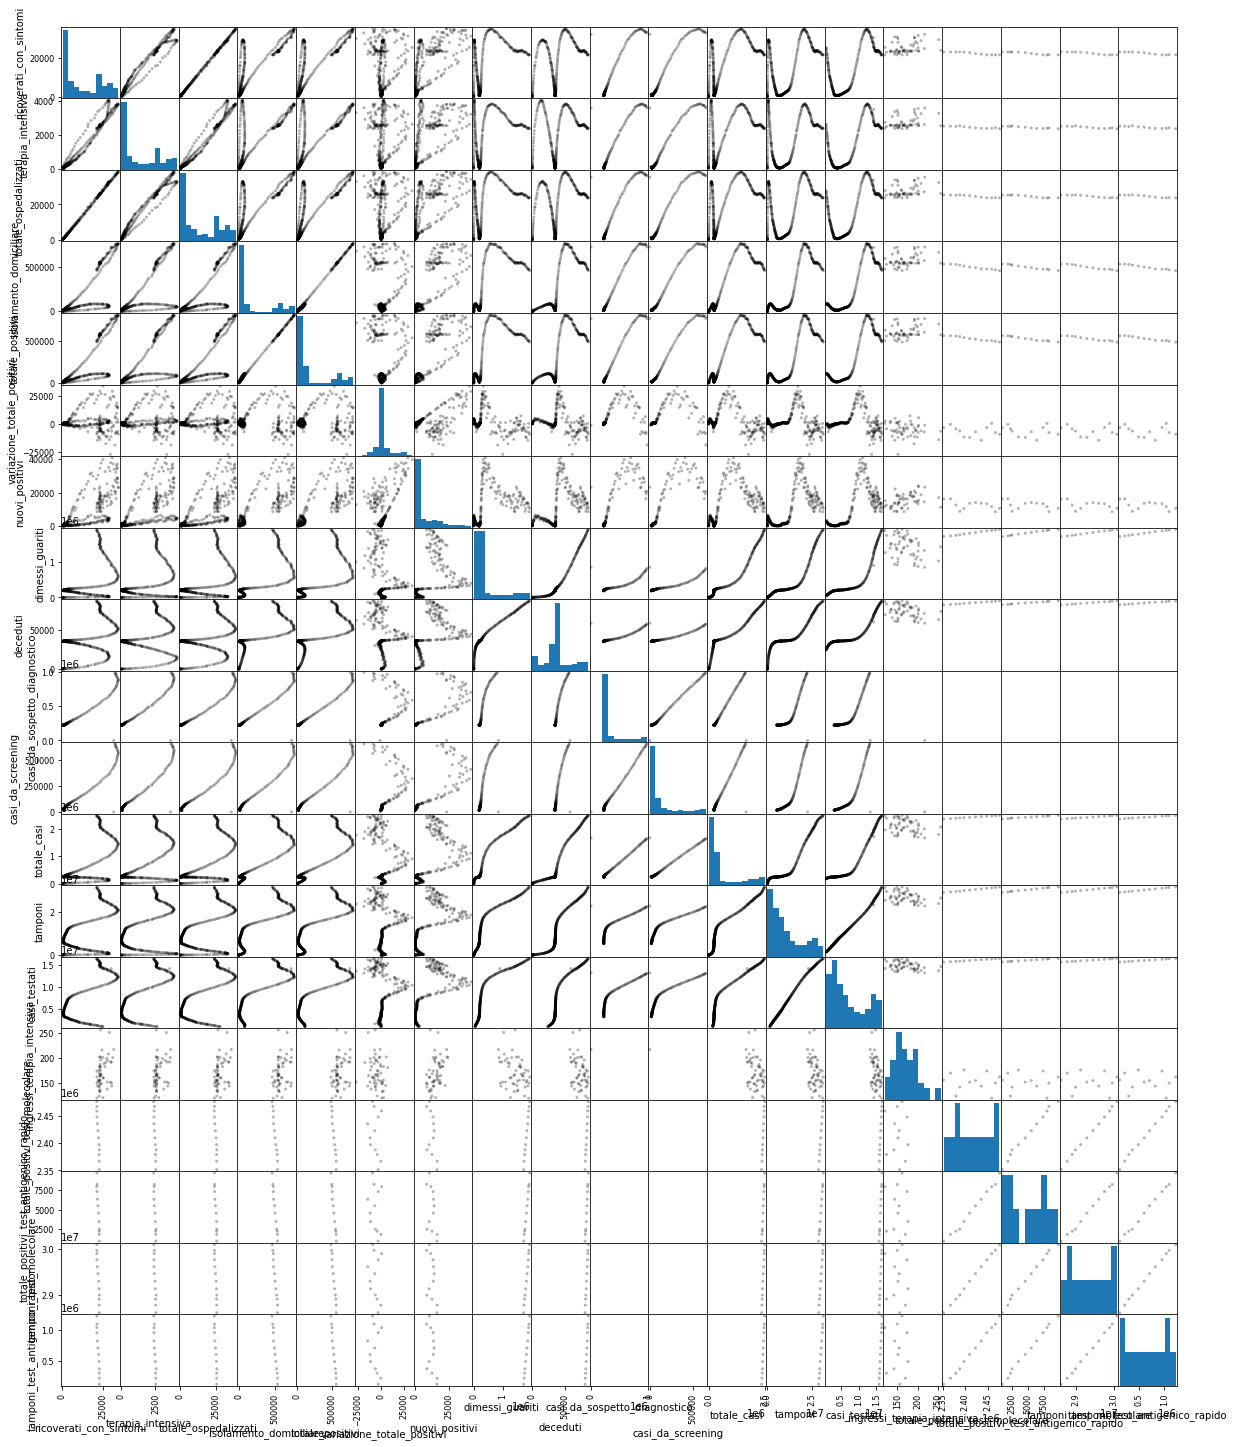

In [488]:
#covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
# covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
# #covid_italy.drop(columns=["note_test","note_casi","totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)
# covid_italy.drop(columns=["note_test","note_casi","totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)


pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()

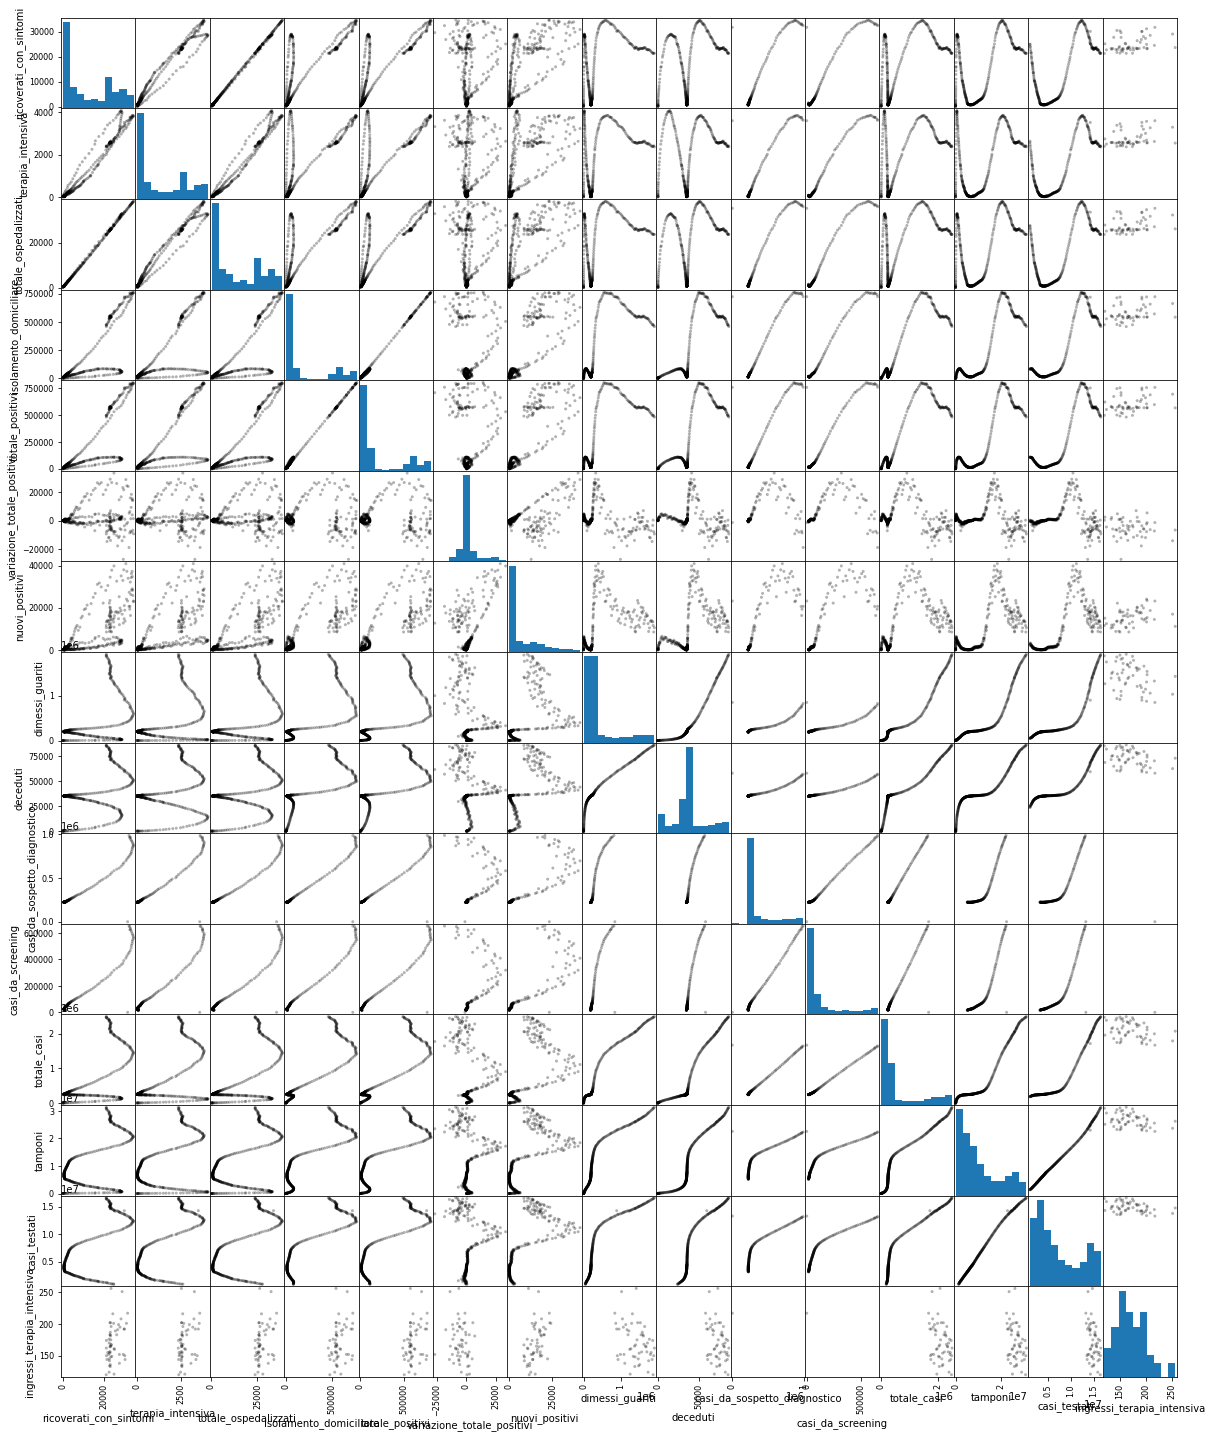

In [490]:
covid_italy.drop(columns=["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)

pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()